# Assignment 5
* Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom
* Create a new Jupyter notebook
* Load the dataset from CSV into pandas
* Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?
* The data is entirely categorical. Convert each feature to dummy variables.
* Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.
Your submission should be your Jupyter notebook, keep it short and concise.

# Results
## Loading the data

In [96]:
import pandas 
from sklearn import datasets
mushrooms = pandas.read_csv("mushroom.data")

## Getting an overview

In [97]:
mushrooms.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Counting occurences of edible and poisonous mushrooms in each habitat

In [98]:
mushrooms.groupby(["habitat", "edibility"]).size()

habitat  edibility
d        e            1880
         p            1268
g        e            1408
         p             740
l        e             240
         p             592
m        e             256
         p              36
p        e             136
         p            1008
u        e              96
         p             272
w        e             192
dtype: int64

## Combing this with cap-color and visualizing the results:
Each column will represent either edible or poisonous mushrooms within a habitat, the coloumn is then colored with the mushroom cap color of the mushrooms within that area.

In [99]:
test = mushrooms.groupby(["habitat", "edibility", "cap-color"]).size().unstack()
test.columns = ("Buff", "Cinnamon", "Red", "Gray", "Brown", "Pink", "Green", "Purple", "White", "Yellow")
colors = ["#f0dc82", "#d2691e", "red", "gray", "brown", "pink", "green", "purple", "#d3d3d3", "#ffd500"]

<Figure size 432x288 with 0 Axes>

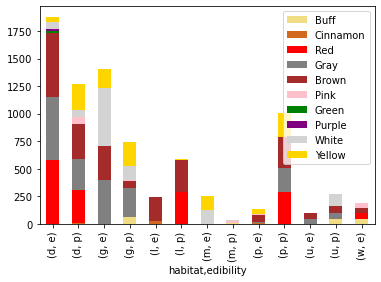

In [100]:
import matplotlib.pyplot as plt
plt.figure()
test.plot.bar(stacked=True, color=colors)
plt.show()

## Converting to dummy variables (1s and 0s)

In [101]:
dummies = pandas.get_dummies(mushrooms)
dummies

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


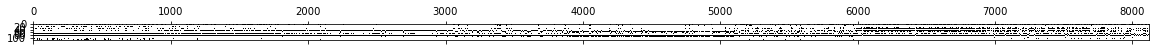

In [102]:
plt.spy(dummies.T)
fig = plt.gcf()
fig.set_size_inches(20,50)
plt.plot()
plt.show()